In [43]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sqlalchemy import create_engine
import pymysql
import json
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import tree
from sklearn.model_selection import train_test_split

In [44]:
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name

In [45]:
cloud_engine = create_engine(f"postgresql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")

In [46]:
cloud_conn = cloud_engine.connect()

In [83]:
africa_data = pd.read_sql("select * from ultimate", cloud_conn)
africa_data.columns


Index(['country_name', 'country_code', 'year', 'conflict_code_freq',
       'conflict_deaths_code', 'population_density',
       'population_growth_annual_per', 'total_population',
       'refugee_pop_origin', 'rural_population', 'rural_population_per',
       'rural_population_growth', 'urban_population', 'urban_population_per',
       'urban_population_growth', 'corruption_control_estimate',
       'corruption_control_percentile', 'government _effectiveness_est',
       'government_effectiveness_percentile', 'stability_est',
       'stability_percentile', 'regulatory_est', 'regulatory_percentile',
       'ruleoflaw_est', 'ruleoflaw_percentile', 'accountability_est',
       'accountability_percentile ', 'ethnic_score', 'gdp_growth_per',
       'gdp_percap_per', 'mortality_rate', 'gdp_total', 'gdp_percap',
       'gni_total', 'fdi_inflows_gdp', 'fdi_inflows_total',
       'conflict_fatalities', 'conflict_events'],
      dtype='object')

In [84]:
africa_data=africa_data[['gdp_percap_per', 'gni_total', 'stability_est', 'ethnic_score', 'corruption_control_estimate', 'government _effectiveness_est', 'mortality_rate', 'conflict_code_freq']]
len(africa_data.columns)


8

In [85]:
target_names=['No Risk', 'Minimal Risk', 'Moderate Risk', 'Increased Risk', 'High Risk', 'Extreme Risk']

In [86]:
feature_names=['GDP per capita', 'Total GNI', 'Government Stability', 'Ethnic Diversity', 'Corruption Control', 'Government Effectiveness', 'Mortality Rate']
len(feature_names)

7

In [87]:
target_df=africa_data['conflict_code_freq']
y=target_df.to_numpy()
y

array([1, 1, 2, ..., 0, 0, 2], dtype=int64)

In [88]:
data_df=africa_data
data_df=data_df.drop('conflict_code_freq', 1)
X=data_df.to_numpy()
len(X[0])

7

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [90]:

# step 1
rf = RandomForestClassifier(n_estimators=100)

# step 2
rf.fit(X_train, y_train)

# step 3 
y_pred=rf.predict(X_test)


In [91]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9695121951219512


In [92]:
importances = rf.feature_importances_
importances

array([0.04971555, 0.17070241, 0.11852434, 0.27882963, 0.11951474,
       0.14012825, 0.12258508])

In [93]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [94]:
feature_imp = pd.Series(rf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

Ethnic Diversity            0.278830
Total GNI                   0.170702
Government Effectiveness    0.140128
Mortality Rate              0.122585
Corruption Control          0.119515
Government Stability        0.118524
GDP per capita              0.049716
dtype: float64

In [95]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
clf.score(X, y)

1.0

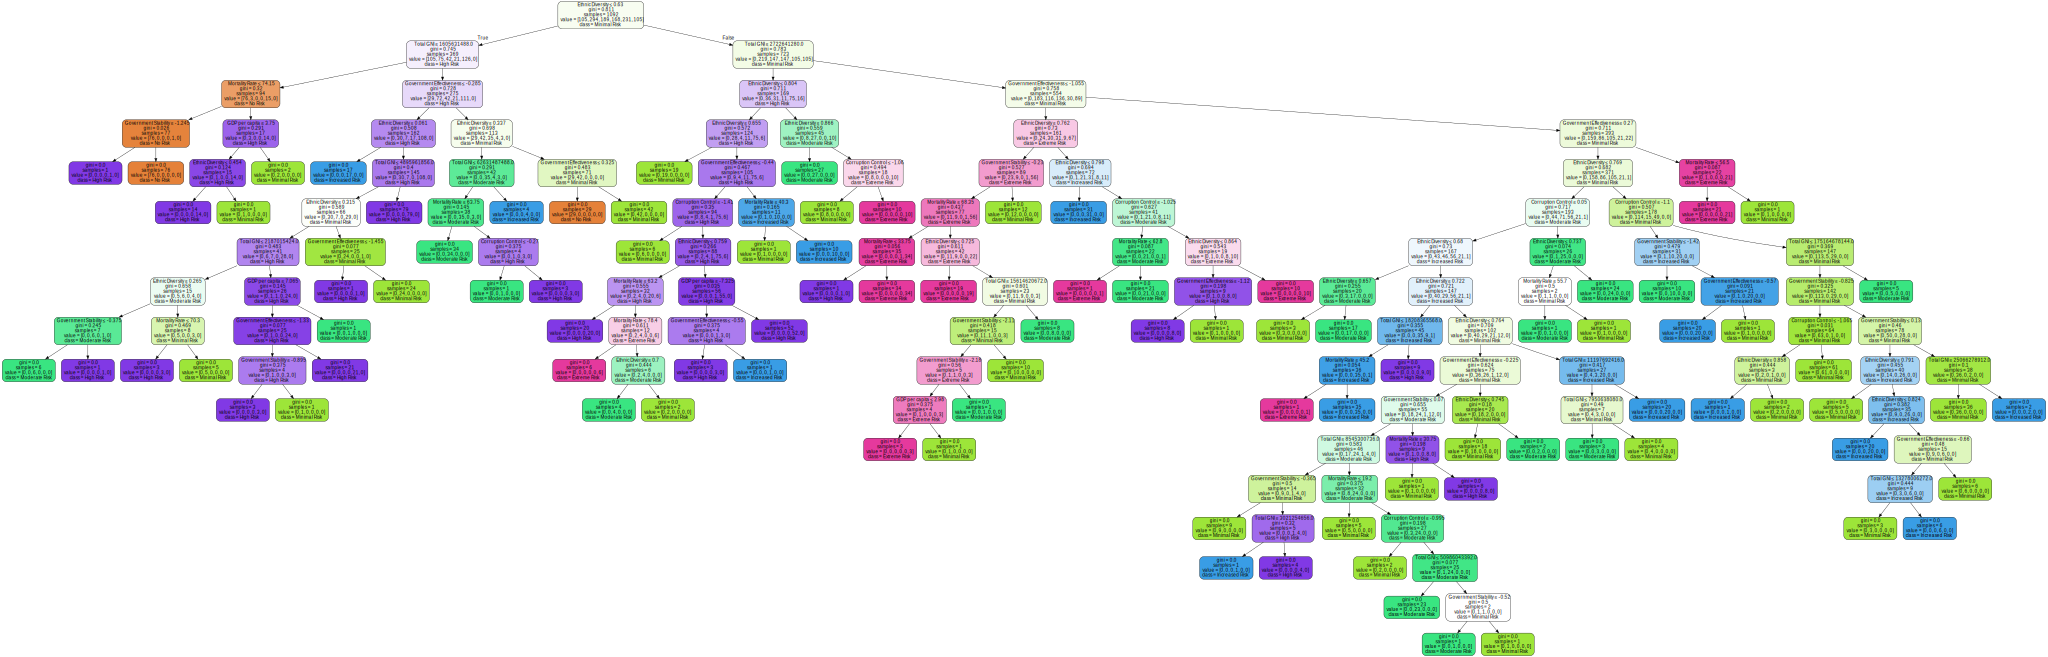

In [96]:
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('conflict.png')

graph = graphviz.Source(dot_data)  
graph 